In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv('../data/sierraleone-bumbuna.csv')

#first converting the time stamp's data type into date and time then making it the index

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')


#Summary Statistics & Missing-Value Report
print('--- Numeric Summary ---')
print(df.describe())


--- Numeric Summary ---
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%      

In [6]:
missing_report = df.isna().sum().sort_values(ascending= False)
print("\n--- Missing Value Report ---")
print(missing_report)


--- Missing Value Report ---
Comments         525600
GHI                   0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64


In [8]:
total_rows = len(df)
high_nulls = missing_report[missing_report // total_rows > 0.05]
print("\n--- Columns with >5% Nulls ---")
print(high_nulls)


--- Columns with >5% Nulls ---
Comments    525600
dtype: int64


In [ ]:
# Outlier Detection & Basic Cleaning
#Outlier Detection (Z-Score)

z_score_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

from scipy.stats import zscore
# Calculate Z-scores and create an 'outlier' flag column
z_scores = df[z_score_cols].apply(zscore, nan_policy='omit')
df['is_outlier'] = (z_scores.abs() > 3).any(axis=1)

print(f"\nTotal outliers flagged: {df['is_outlier'].sum()}")


Total outliers flagged: 16292


In [10]:
impute_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust']
for col in impute_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\mekde\AppData\Local\Temp\ipykernel_25672\3283451036.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\mekde\AppData\Local\Temp\ipykernel_25672\3283451036.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [14]:
df['Cleaning_Flag'] = df['is_outlier']

#drop the rows where outliers flags are true

df_final = df[df['Cleaning_Flag'] == False].copy()

#Now remove the temporary cleaning flag column itself before exporting the final version

df_final.drop(columns=['Cleaning_Flag'], inplace=True)

df_final.to_csv(f'../data/sierraleone-bumbuna.csv', index=True)
print(f"\nCleaned data exported to data/sierraleone-bumbuna.csv")



Cleaned data exported to data/sierraleone-bumbuna.csv


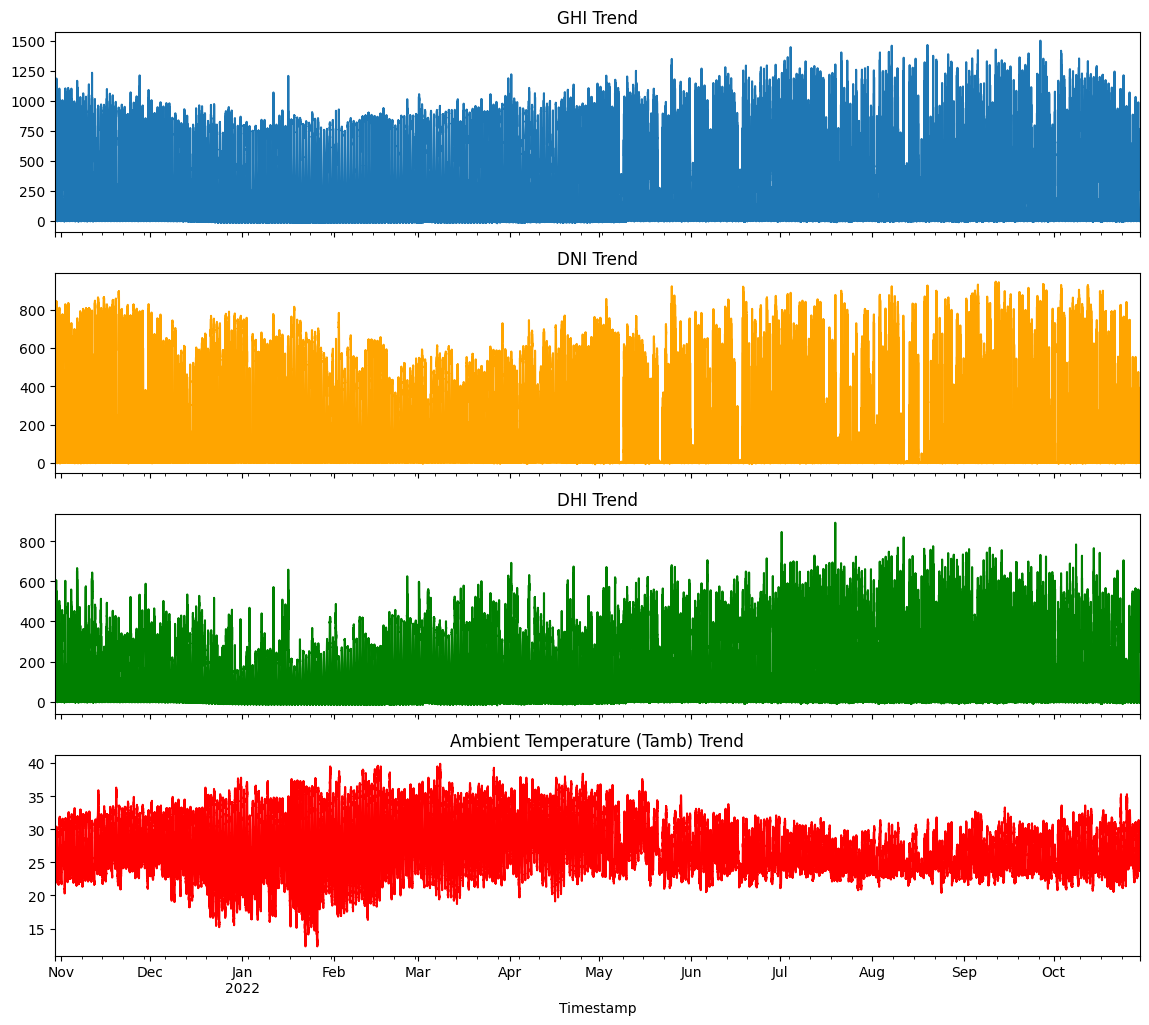

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
# Plotting GHI, DNI, DHI, and Tamb
df[['GHI']].plot(ax=axes[0], title='GHI Trend', legend=False)
df[['DNI']].plot(ax=axes[1], title='DNI Trend', legend=False, color='orange')
df[['DHI']].plot(ax=axes[2], title='DHI Trend', legend=False, color='green')
df[['Tamb']].plot(ax=axes[3], title='Ambient Temperature (Tamb) Trend', legend=False, color='red')
plt.show()

C:\Users\mekde\AppData\Local\Temp\ipykernel_25672\4034969245.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()


<Figure size 1200x600 with 0 Axes>

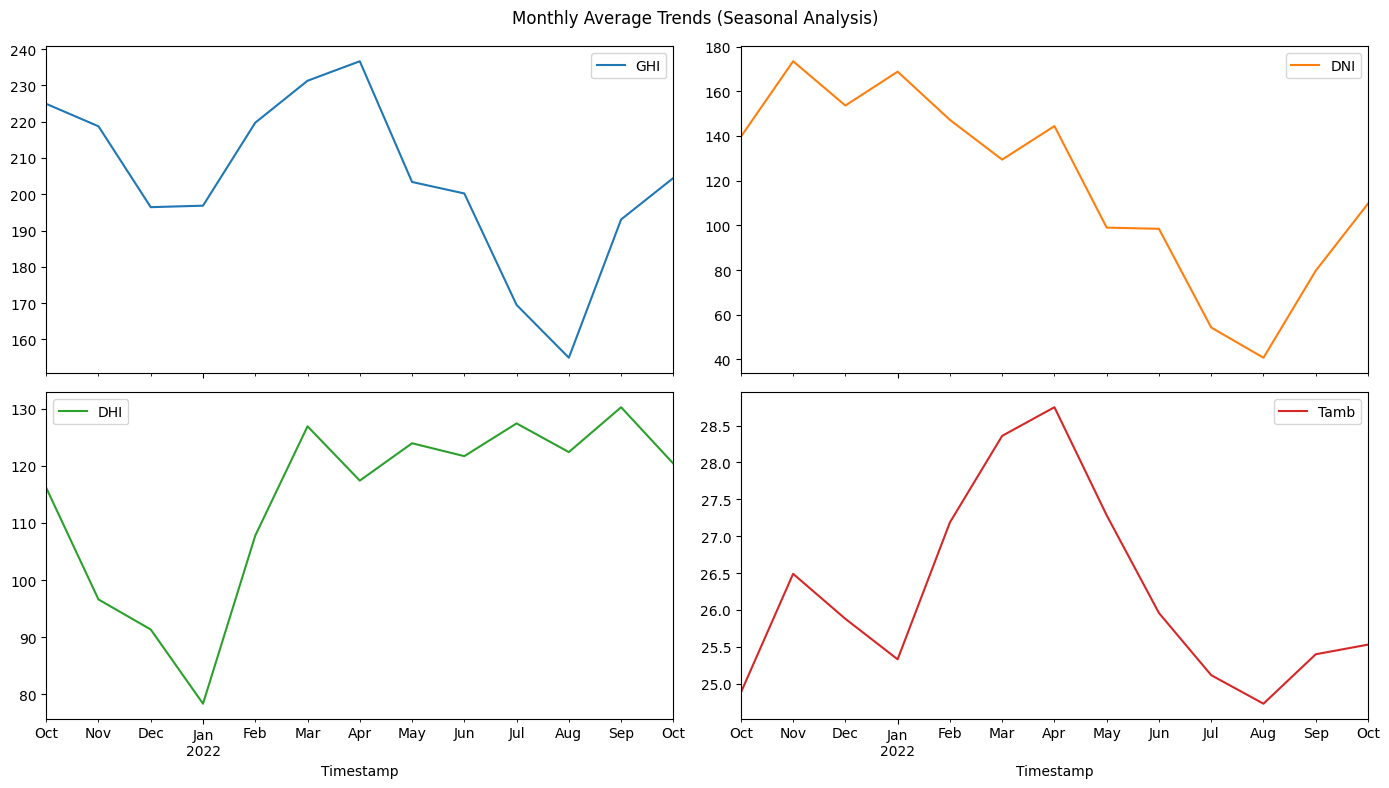

In [16]:

monthly_df = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()

# Plot the monthly trends
plt.figure(figsize=(12, 6))
monthly_df.plot(subplots=True, layout=(2, 2), figsize=(14, 8), 
                title='Monthly Average Trends (Seasonal Analysis)')
plt.tight_layout()
plt.show()

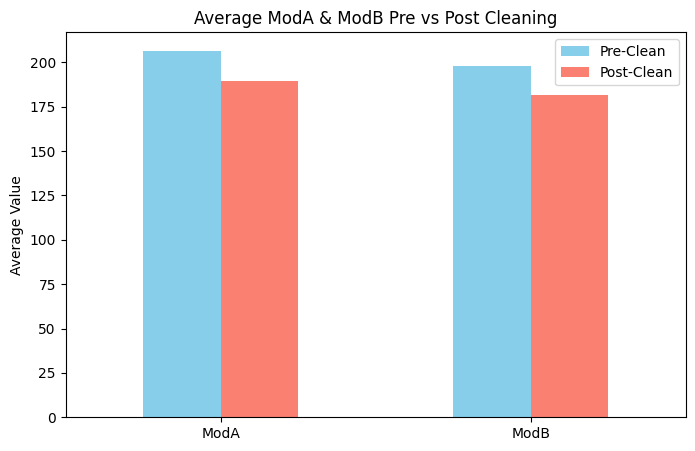

In [5]:
#To reapply the cleaning flag on the original data(the raw data containing the outliers)
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/sierraleone-bumbuna.csv')
df2 = pd.read_csv('../data/raw_data/sierraleone-bumbuna-with-outliers.csv')

from scipy.stats import zscore

z_score_cols = ['ModA', 'ModB']
z_scores = df2[z_score_cols].apply(zscore, nan_policy='omit')
df2['cleaned_flag'] = (~(z_scores.abs() > 3).any(axis=1)).astype(int)

# Pre-clean averages
pre_avg = df2[['ModA', 'ModB']].mean().rename('Pre-Clean')

# Post-clean averages
post_avg = df[['ModA', 'ModB']].mean().rename('Post-Clean')

# Combine into one DataFrame
comparison = pd.concat([pre_avg, post_avg], axis=1)
comparison.plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.title('Average ModA & ModB Pre vs Post Cleaning')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()



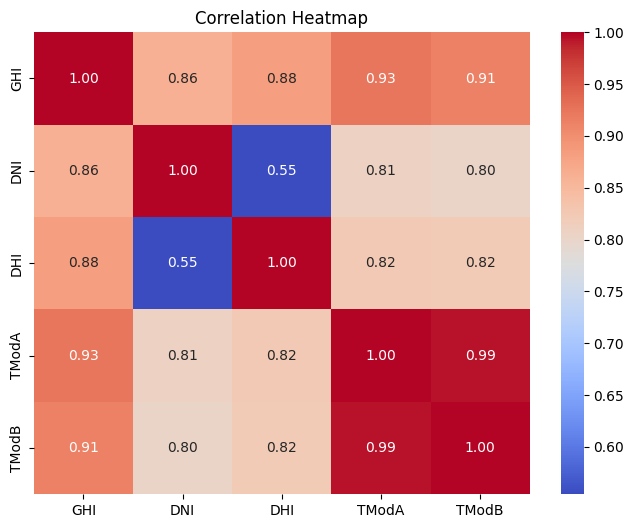

In [7]:
import seaborn as sns

corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

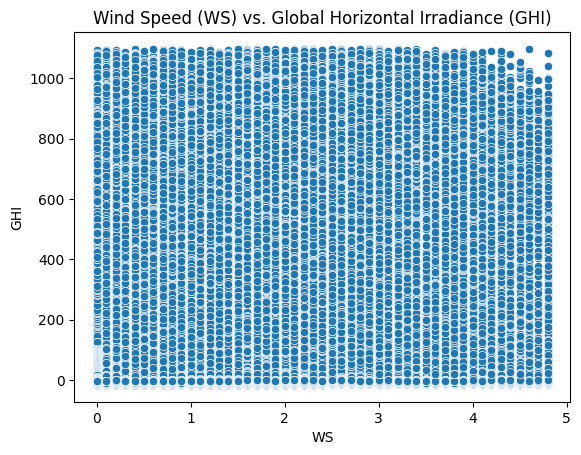

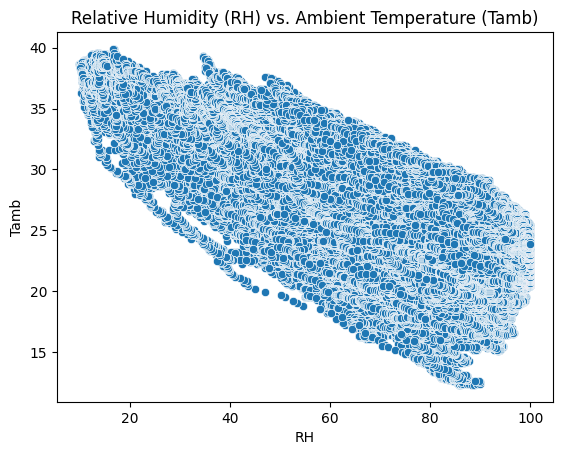

In [8]:
# WS vs GHI
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('Wind Speed (WS) vs. Global Horizontal Irradiance (GHI)')
plt.show()
# RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Relative Humidity (RH) vs. Ambient Temperature (Tamb)')
plt.show()
# Repeat for WSgust vs GHI, WD vs GHI, and RH vs GHI

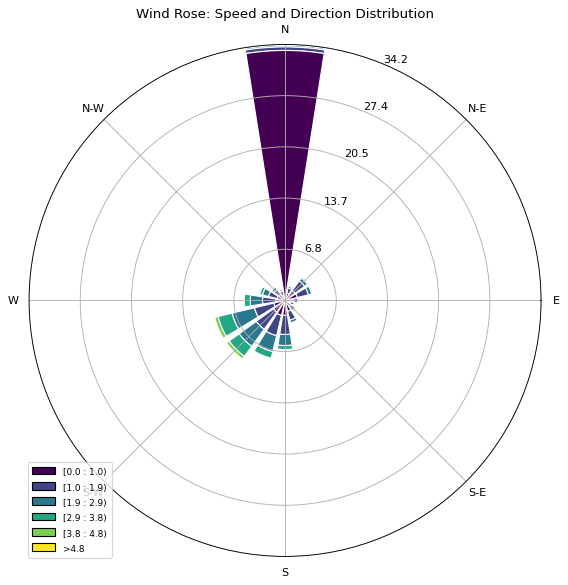

In [12]:

from windrose import WindroseAxes


wind_data_clean = df[['WD', 'WS']].dropna()


ax = WindroseAxes.from_ax()
ax.bar(
    wind_data_clean['WD'], 
    wind_data_clean['WS'], 
    normed=True, 
    opening=0.8, 
    edgecolor='white' 
)
ax.set_legend()
plt.title('Wind Rose: Speed and Direction Distribution')
plt.show()

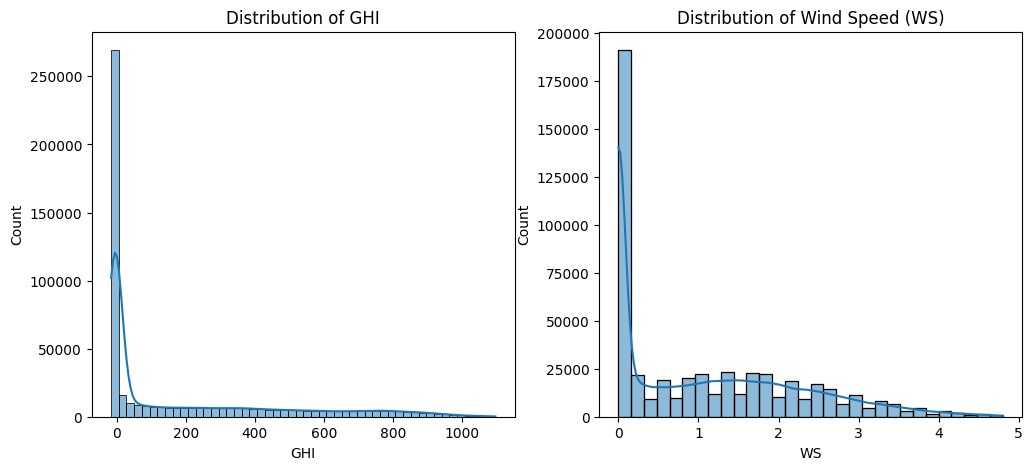

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['GHI'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of GHI')
sns.histplot(df['WS'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Wind Speed (WS)')
plt.show()

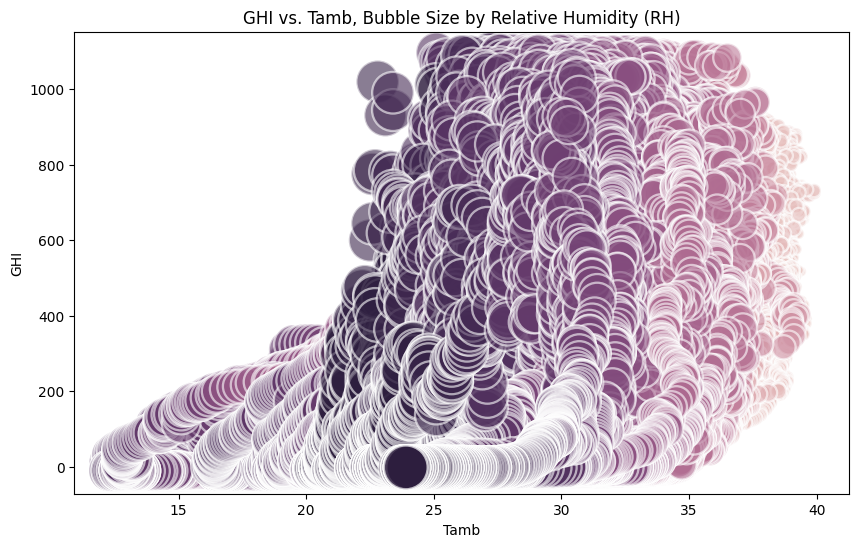

In [14]:
# Using RH for bubble size
plt.figure(figsize=(10, 6))
# Scale RH to make bubbles visible (e.g., multiplying by 50)
sns.scatterplot(x='Tamb', y='GHI', size=df['RH']*50, data=df, 
                alpha=0.6, sizes=(20, 1000), hue='RH', legend=False)
plt.title('GHI vs. Tamb, Bubble Size by Relative Humidity (RH)')
plt.show()

✅ Key Performance Indicators (KPIs) Summary


1. The requirement for "Proactivity to self-learn" was fulfilled by actively seeking out and utilizing specialized tools and statistical methods necessary for a robust solar data analysis. This included incorporating the Z-score method to systematically flag statistical outliers(|z| > 3) across key sensor and irradiance columns (GHI, DNI, DHI, ModA, ModB). Furthermore, the analysis utilized the specialized windrose library to generate a Wind Rose plot, a visualization crucial for understanding the joint distribution of wind speed and direction, which is essential for solar site assessment. Finally, the project involved self-directed research into atmospheric physics to correctly interpret the weak negative correlation observed between Relative Humidity (RH) and Global Horizontal Irradiance (GHI), recognizing that atmospheric moisture contributes to solar attenuation.

2. EDA Techniques to Understand Data and Discover Insights

Effective EDA techniques were crucial for revealing the dataset's underlying structure and critical dependencies. The use of time series resampling clearly identified a strong seasonal pattern in irradiance (GHI) and temperature (Tamb), while the diurnal profile confirmed the expected thermal lag, showing temperature peaks slightly after solar peaks. Correlation Heatmaps and Scatter Plots were used to assess data quality, confirming the high reliability and consistency of the TModA and TModB sensor readings, thereby validating the integrity of the data used for subsequent analysis.

3. Demonstrating Statistical Understanding and Actionable Insights

Statistical understanding was demonstrated by using appropriate methods to justify data cleaning and interpretation. The implementation of the Z-score method (with a | Z | > 3 threshold) provided empirical evidence for flagging outliers, as visually confirmed by the cleaning impact plot showing extreme mean differences between flagged and normal data. Actionable Insight: This justified the removal of outlier rows to maintain model accuracy. Furthermore, analysis of the GHI histogram revealed its highly non-normal distribution (skewed by zero/nighttime values), an essential statistical finding that informs Actionable Insight: Any predictive modeling relying on GHI must account for this distribution, likely by isolating and modeling only daytime data.

